In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt 

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 29s 0us/step


In [3]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
base_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

58889256/58889256 [==============================] - 3s 0us/step


In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [6]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
train_generator  = ImageDataGenerator(
    preprocessing_function=preprocess_input,
      rotation_range=40, 
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

val_generator = ImageDataGenerator(
preprocessing_function=preprocess_input)

In [9]:
train_generator.fit(x_train)
val_generator.fit(x_test)

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [11]:
history=model.fit(train_generator.flow(x_train,y_train,batch_size=32),
                      epochs=30,
                      steps_per_epoch=x_train.shape[0]//32,
                      validation_data=val_generator.flow(x_test,y_test,batch_size=32),validation_steps=250,
                      verbose=1)

Epoch 1/30
1562/1562 [==============================] - 59s 31ms/step - loss: 4.9661 - accuracy: 0.3677 - val_loss: 2.9966 - val_accuracy: 0.4820
Epoch 2/30
1562/1562 [==============================] - 49s 31ms/step - loss: 2.7451 - accuracy: 0.4460 - val_loss: 2.1837 - val_accuracy: 0.5107
Epoch 3/30
1562/1562 [==============================] - 49s 31ms/step - loss: 2.0903 - accuracy: 0.4706 - val_loss: 1.7670 - val_accuracy: 0.5309
Epoch 4/30
1562/1562 [==============================] - 49s 32ms/step - loss: 1.7365 - accuracy: 0.4930 - val_loss: 1.5004 - val_accuracy: 0.5519
Epoch 5/30
1562/1562 [==============================] - 49s 31ms/step - loss: 1.5257 - accuracy: 0.5077 - val_loss: 1.3413 - val_accuracy: 0.5706
Epoch 6/30
1562/1562 [==============================] - 48s 31ms/step - loss: 1.4065 - accuracy: 0.5266 - val_loss: 1.2836 - val_accuracy: 0.5786
Epoch 7/30
1562/1562 [==============================] - 48s 31ms/step - loss: 1.3304 - accuracy: 0.5442 - val_loss: 1.2242 -

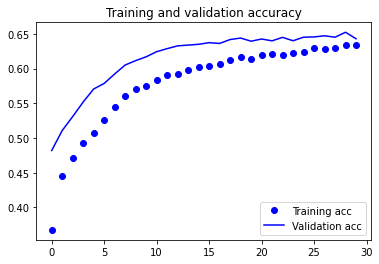

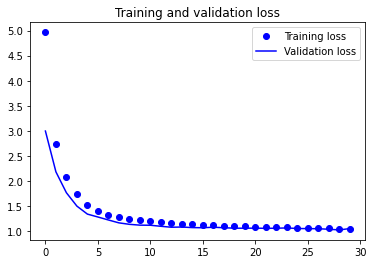

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [14]:
base_model.trainable = True

set_trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-5),
    metrics=['accuracy']
)

In [16]:
history=model.fit(train_generator.flow(x_train,y_train,batch_size=32),
                      epochs=30,
                      steps_per_epoch=x_train.shape[0]//32,
                      validation_data=val_generator.flow(x_test,y_test,batch_size=32),validation_steps=250,
                      verbose=1)

Epoch 1/30
1562/1562 [==============================] - 52s 31ms/step - loss: 1.0032 - accuracy: 0.6501 - val_loss: 0.9468 - val_accuracy: 0.6789
Epoch 2/30
1562/1562 [==============================] - 48s 31ms/step - loss: 0.9399 - accuracy: 0.6713 - val_loss: 0.8674 - val_accuracy: 0.7020
Epoch 3/30
1562/1562 [==============================] - 49s 31ms/step - loss: 0.8966 - accuracy: 0.6850 - val_loss: 0.8589 - val_accuracy: 0.7128
Epoch 4/30
1562/1562 [==============================] - 50s 32ms/step - loss: 0.8651 - accuracy: 0.6963 - val_loss: 0.8639 - val_accuracy: 0.7084
Epoch 5/30
1562/1562 [==============================] - 49s 31ms/step - loss: 0.8350 - accuracy: 0.7067 - val_loss: 0.8326 - val_accuracy: 0.7170
Epoch 6/30
1562/1562 [==============================] - 50s 32ms/step - loss: 0.8140 - accuracy: 0.7142 - val_loss: 0.8062 - val_accuracy: 0.7300
Epoch 7/30
1562/1562 [==============================] - 50s 32ms/step - loss: 0.7870 - accuracy: 0.7233 - val_loss: 0.8258 -

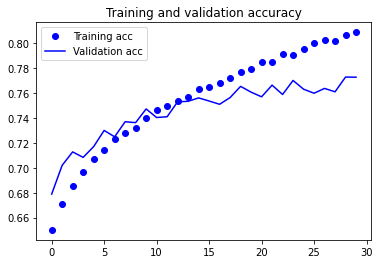

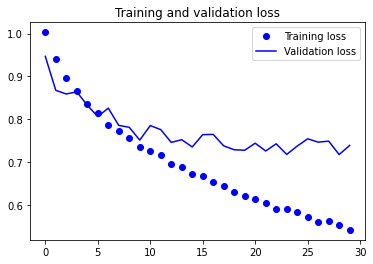

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

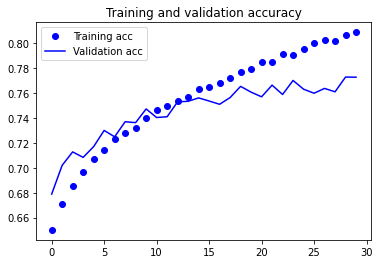

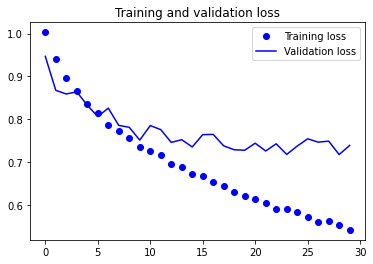

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()